# SIOT Josephine Latreille

### January 2019


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import sys

# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


%matplotlib inline  

/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


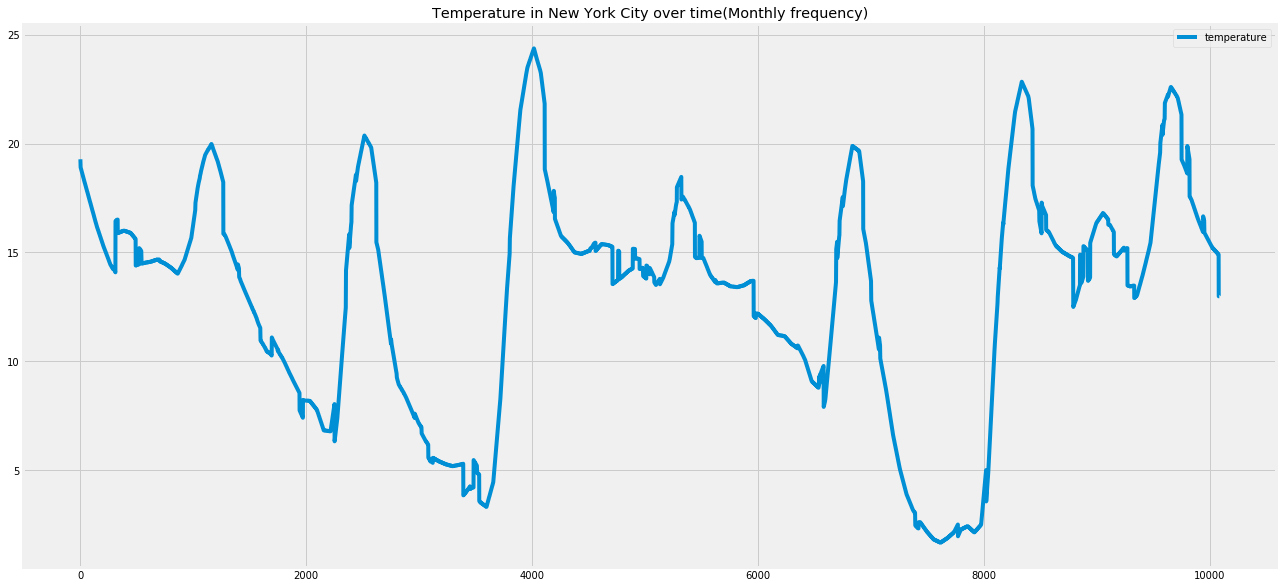

In [14]:
bus_data = pd.read_csv('SIOT-data-bus.csv')
weather_data = pd.read_csv('SIOT-data-weather.csv')

data = pd.concat([weather_data, bus_data], axis=1, sort=False)

data.fillna(data.mean(), inplace= True)
data.fillna('non', inplace=True)

plt.figure(figsize=(20, 10))
variable= "Temperature"
data[variable].plot(label ="temperature") 
plt.title("Temperature in New York City over time(Monthly frequency)")
plt.legend()
plt.show()


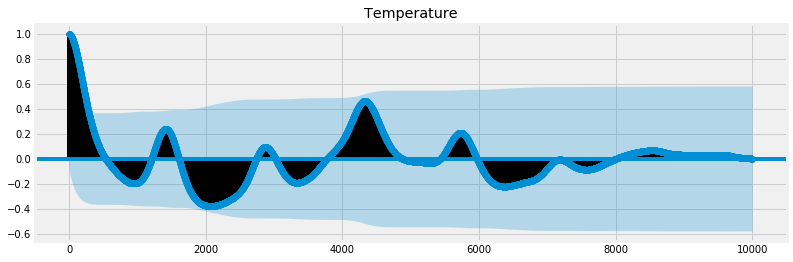

In [20]:
# Autocorrelation of humidity of San Diego

ts = data['Temperature']
acf = plot_acf(ts, lags=10000,title="Temperature")
acf.set_figheight(4)
acf.set_figwidth(12)
plt.show()

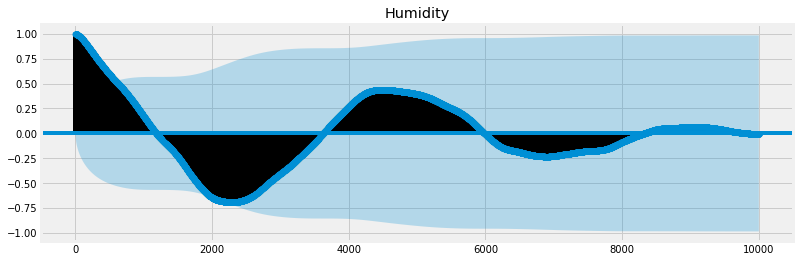

In [47]:
ts = data['Humidity']
acf = plot_acf(ts, lags=10000,title="Humidity")
acf.set_figheight(4)
acf.set_figwidth(12)
plt.show()

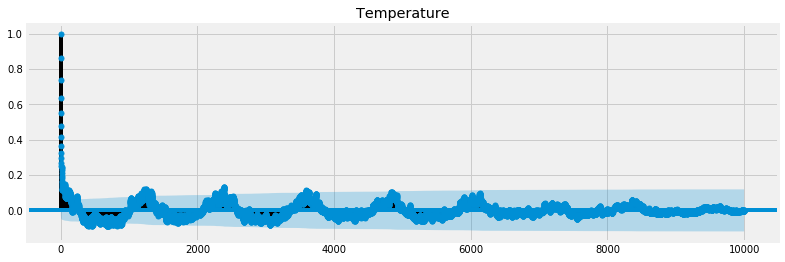

In [22]:
ts = data['Distance']
acf = plot_acf(ts, lags=10000,title="Distance")
acf.set_figheight(4)
acf.set_figwidth(12)
plt.show()

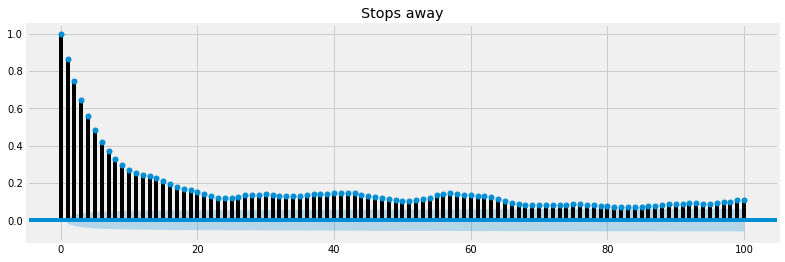

In [26]:
ts = data['Stops away']
acf = plot_acf(ts, lags=100,title="Stops away")
acf.set_figheight(4)
acf.set_figwidth(12)
plt.show()

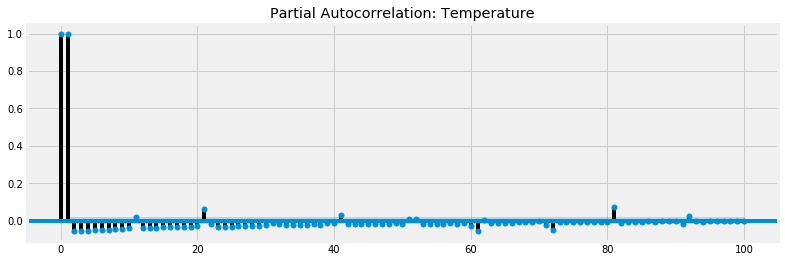

In [27]:
# Partial Autocorrelation of humidity of San Diego
pacf = plot_pacf(data["Temperature"],lags=100, title="Partial Autocorrelation: Temperature")
pacf.set_figheight(4)
pacf.set_figwidth(12)
plt.show()

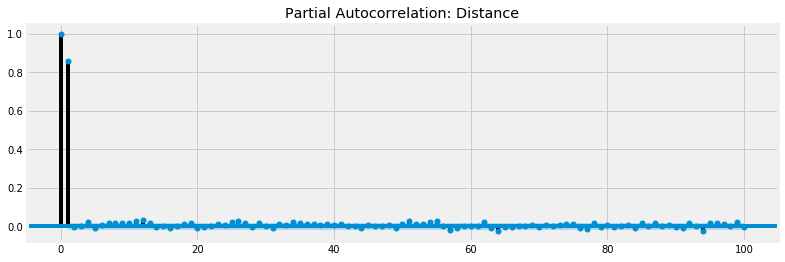

In [28]:
# Partial Autocorrelation of humidity of San Diego
pacf = plot_pacf(data["Distance"],lags=100, title="Partial Autocorrelation: Distance")
pacf.set_figheight(4)
pacf.set_figwidth(12)
plt.show()

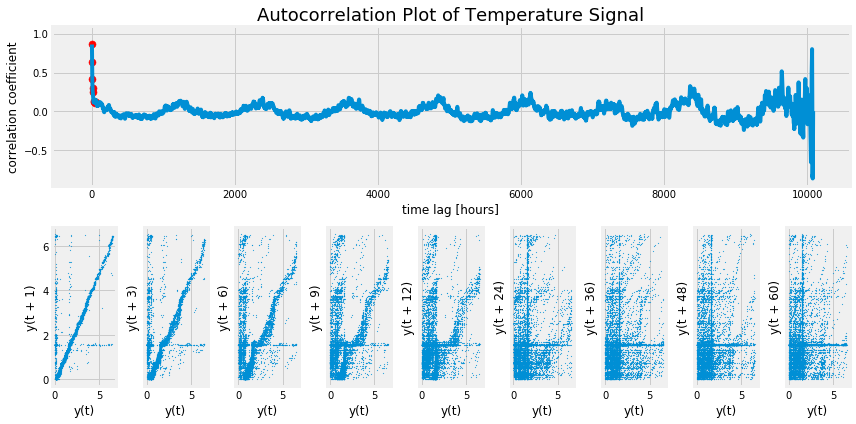

In [57]:
#%% show autocorr and lag plots
import matplotlib.gridspec as gridspec
from pandas.plotting import autocorrelation_plot, lag_plot


cityToShow = 'Distance'
selectedLagPoints = [1,3,6,9,12,24,36,48,60]
maxLagDays = 1200

originalSignal = data[cityToShow]

# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Distance Signal', fontsize=18);
axTopRow.set_xlabel('time lag [hours]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [originalSignal.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(originalSignal, lag=selectedLagPoints[i], s=0.5, alpha=0.7, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

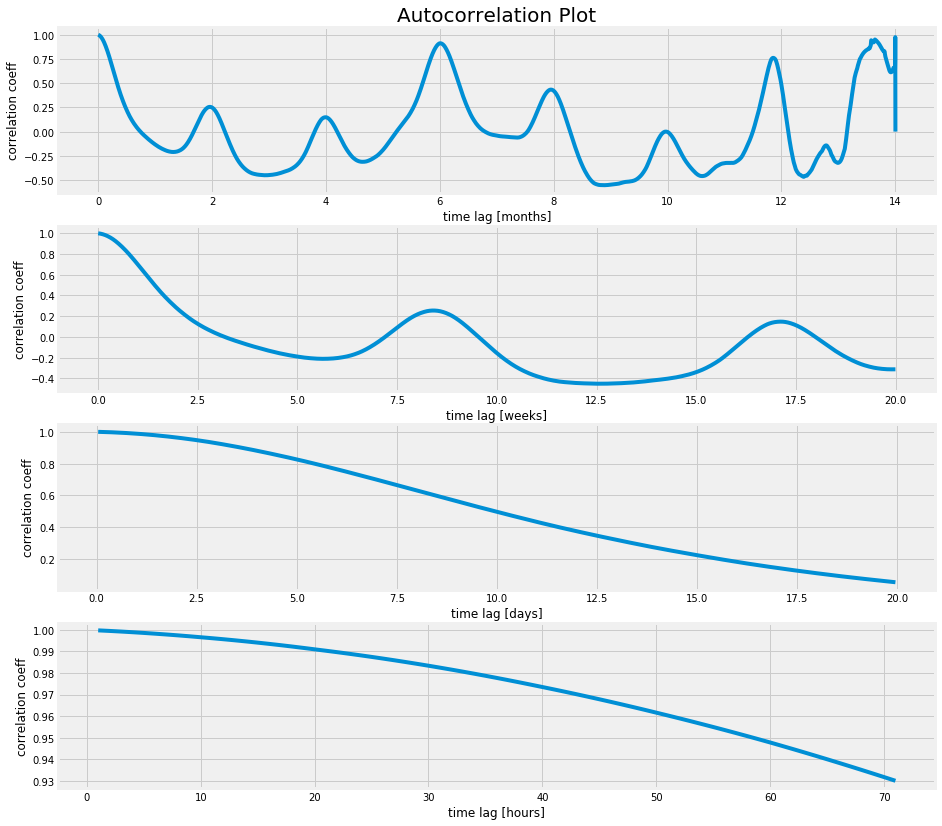

In [34]:
#%% zoom in and out on the autocorr plot
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(14,14))

timeLags = np.arange(1,25*24*30)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*30)*timeLags, autoCorr); ax[0].set_title('Autocorrelation Plot', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24*7)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/(24*7)*timeLags, autoCorr);
ax[1].set_xlabel('time lag [weeks]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1.0/24*timeLags, autoCorr);
ax[2].set_xlabel('time lag [days]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [hours]'); ax[3].set_ylabel('correlation coeff', fontsize=12);

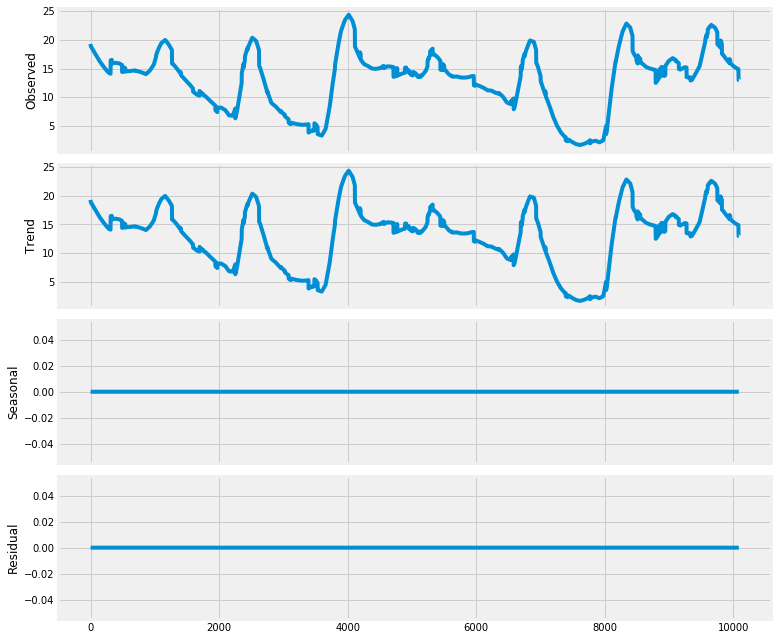

In [37]:
alb = data["Temperature"]

ts =alb
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ts,freq=1) # The frequncy is annual
figure = decomposed.plot()
plt.show()


## Split the dataset

In [2]:
# AB

bus_data = pd.read_csv('SIOT-data-bus.csv')
weather_data = pd.read_csv('SIOT-data-weather.csv')

cancer_data = pd.concat([weather_data, bus_data], axis=1, sort=False)


train, tests = train_test_split(cancer_data, test_size = 0.4, random_state = 42)
test,validate = train_test_split(tests, test_size = 0.5, random_state = 42)
train.to_csv('Train_cancer.csv', index=False)
test.to_csv('Test_cancer.csv', index=False)
validate.to_csv('Validate_cancer.csv', index=False)

train = pd.read_csv('Train_cancer.csv')
train['Timestamp'] = pd.to_datetime(train['Timestamp'], infer_datetime_format=True)

train.head()
#train['diagnosis']

,Timestamp,Cloud cover,Temperature,Humidity,Icon,Precip intensity,Precip probability,Route,Stop,Stops away,Distance
0,2019-01-02 06:51:06,1.00,19.25,0.90,snow,0.0089,0.11,B57,SMITH ST/UNION ST,13.0,1.60
1,2019-01-04 06:55:04,0.98,21.26,0.59,cloudy,0.0000,0.00,B57,SMITH ST/UNION ST,9.0,1.10
2,2019-01-04 15:27:06,1.00,14.97,0.76,cloudy,0.0024,0.03,B57,SMITH ST/UNION ST,11.0,1.44
3,2019-01-05 03:25:04,0.99,13.71,0.93,snow,0.0105,0.06,B57,SMITH ST/UNION ST,5.0,0.68
4,2019-01-07 16:15:06,0.61,14.80,0.41,partly-cloudy-night,0.0000,0.00,B57,SMITH ST/UNION ST,7.0,0.95


/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/datetimes.py:574: UserWarning: Discarding nonzero nanoseconds in conversion
  index = _generate_regular_range(start, end, periods, freq)


TypeError: Empty 'DataFrame': no numeric data to plot

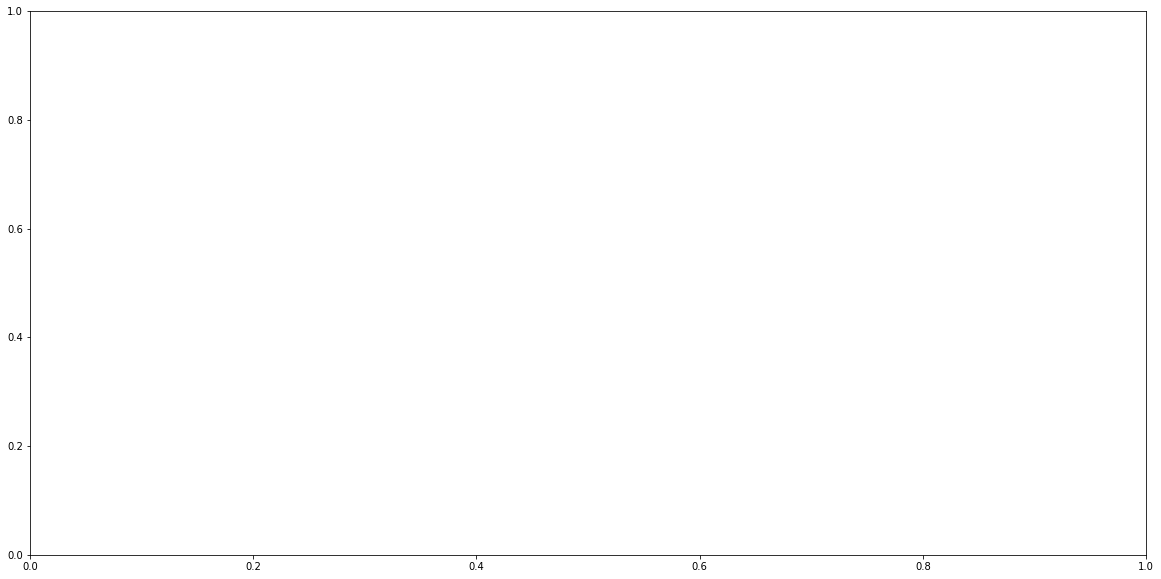

In [23]:
freq = 'M'
ts = cancer_data["Stops away"]
plt.figure(figsize=(20, 10))
ts.asfreq('M').plot()



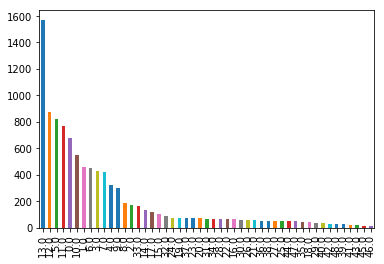

In [21]:
train.hist(column='Icon')

cancer_data[''].value_counts().plot(kind='bar')


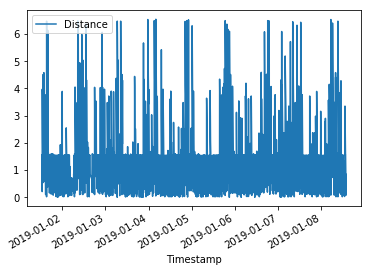

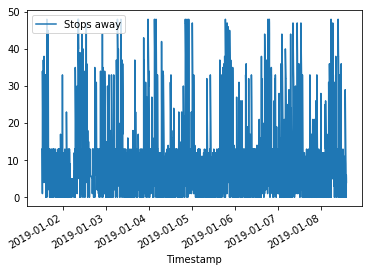

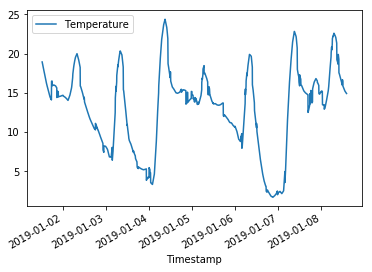

In [41]:
train.plot(x='Timestamp', y='Distance')

train.plot(x='Timestamp', y='Stops away')

train.plot(x='Timestamp', y='Temperature')

# train['Distance'].mean
# train.drop(train.columns[0], axis=1, inplace=True) # dropping 

    

## 1. Exploratory

The exploratory analysis should provide an answer to the following questions:
- What does the data look like?
- How are the numerical variables distributed? 
- Are there any outliers?
- Are there any key correlations?
- How are we treating categorical variables? 
- What are the most important factors?
- Are there any interesting correlations that should be explored later? 
The exploratory analysis should also allow us to determine a set of potential variables that could be used to train our models. We should also identify any inherent limitations of the data.


### 1.1 Scatter Plots
3 scatter pltos were produced to expore correlations between the 3 types of data: mean values, worst case values, and standard error values. 

For the mean values:

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


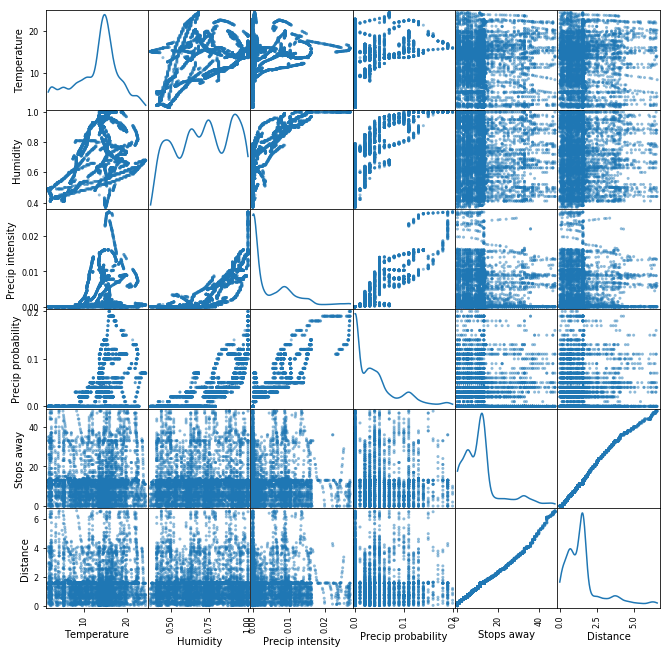

In [10]:
#JM, AB

train.drop(train.columns[12:len(train.columns)], axis=1, inplace=True) # dropping everything apart from 'means'
                                                                        # and 'diagnosis' as it is categorical
train.drop(train.columns[0], axis=1, inplace=True) # dropping ID

fig = pd.scatter_matrix(train, diagonal = 'kde', figsize = (11,11))


For the se values:

In [11]:
#JM, AB

train = pd.read_csv('Train_cancer.csv')
train.drop(train.columns[1:12], axis=1, inplace=True) # dropping everything apart from 'means'
                                                      # and 'diagnosis' as it is categorical
train.drop(train.columns[11:len(train.columns)], axis=1, inplace=True)

train.drop(train.columns[0], axis=1, inplace=True) # dropping ID
fig = pd.scatter_matrix(train, diagonal = 'kde', figsize = (11,11))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


ValueError: num must be 1 <= num <= 0, not 1

<Figure size 792x792 with 0 Axes>

For the worst values:

In [12]:
#JM, AB

train = pd.read_csv('Train_cancer.csv')
train.drop(train.columns[1:23], axis=1, inplace=True) # dropping everything apart from 'means'
                                                      # and 'diagnosis' as it is categorical

train.drop(train.columns[0], axis=1, inplace=True) # dropping ID
fig = pd.scatter_matrix(train, diagonal = 'kde', figsize = (11,11))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


ValueError: num must be 1 <= num <= 0, not 1

<Figure size 792x792 with 0 Axes>

### 1.2 Violin Plots

Violing plots were produced to examine data dsitribution.
For the mean data:

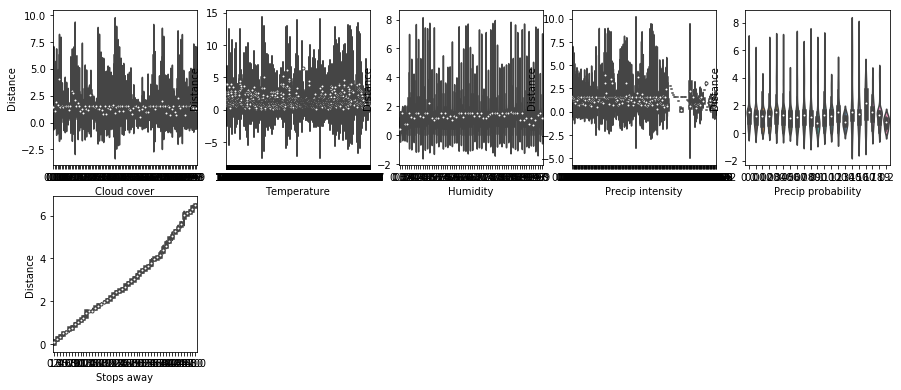

In [18]:
#KJ, JM

train = pd.read_csv('Train_cancer.csv')

train.drop(train.columns[0], axis=1, inplace=True) # dropping ID

column_list = list(train.columns)
column_list.remove('Route')
column_list.remove('Stop')
column_list.remove('Distance')
column_list.remove('Icon')

mainfig = plt.figure(figsize=(15,20))
i = 1
for column in column_list:
    ax = mainfig.add_subplot(6,5,i)
    sns.violinplot(x = column, y = 'Distance', data = train, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Distance')
    i = i+1
    

### 1.3 P - Values from T-Test
T test indidicate significant diffrences between groups. They can serve as a first indicator of values that should be included in a model. 

In [49]:

# AB

bus_data = pd.read_csv('SIOT-data-bus.csv')
weather_data = pd.read_csv('SIOT-data-weather.csv')

cancer_data = pd.concat([weather_data, bus_data], axis=1, sort=False)

cancer_data.head()

#train, tests = train_test_split(cancer_data, test_size = 0.4, random_state = 42)
#test,validate = train_test_split(tests, test_size = 0.5, random_state = 42)
#train.to_csv('Train_cancer.csv', index=False)
#test.to_csv('Test_cancer.csv', index=False)
#validate.to_csv('Validate_cancer.csv', index=False)

#train = pd.read_csv('Train_cancer.csv')
#train['Timestamp'] = pd.to_datetime(train['Timestamp'], infer_datetime_format=True)

train.head()
#train['diagnosis']

,Timestamp,Cloud cover,Temperature,Humidity,Icon,Precip intensity,Precip probability,Route,Stop,Stops away,Distance
0,2019-01-02 06:51:06,1.00,19.25,0.90,snow,0.0089,0.11,B57,SMITH ST/UNION ST,13.0,1.60
1,2019-01-04 06:55:04,0.98,21.26,0.59,cloudy,0.0000,0.00,B57,SMITH ST/UNION ST,9.0,1.10
2,2019-01-04 15:27:06,1.00,14.97,0.76,cloudy,0.0024,0.03,B57,SMITH ST/UNION ST,11.0,1.44
3,2019-01-05 03:25:04,0.99,13.71,0.93,snow,0.0105,0.06,B57,SMITH ST/UNION ST,5.0,0.68
4,2019-01-07 16:15:06,0.61,14.80,0.41,partly-cloudy-night,0.0000,0.00,B57,SMITH ST/UNION ST,7.0,0.95


In [38]:
#AB, JL

train = pd.read_csv('Train_cancer.csv')

def pvalue(testmetric): # testmetric should be a string
    M_metric = train[train['Icon'] == 'clear-day'][testmetric]
    B_metric = train[train['Icon'] == 'cloudy'][testmetric]
    p_val  = scipy.stats.ttest_ind(M_metric, B_metric).pvalue
    return p_val

testmetrics = list(train.columns)
testmetrics.remove('Icon')
testmetrics.remove('Route')
testmetrics.remove('Stop')
testmetrics.remove('Timestamp')

pvals = []
compares = []
for metric in testmetrics:
    p_val = pvalue(metric)
    pvals.append(p_val)
    compares.append(metric)
print 'P Value  Compare 1   Compare 2'
print '-------------------------------'
for pval, com in zip(pvals, compares):
    print '%5.3f    Icon   %s' %(pval, com)

P Value  Compare 1   Compare 2
-------------------------------
0.000    Icon   Cloud cover
0.000    Icon   Temperature
0.000    Icon   Humidity
0.000    Icon   Precip intensity
0.000    Icon   Precip probability
0.000    Icon   Stops away
0.001    Icon   Distance


In [46]:

snow =  data['Icon']=='cloudy'
data_snow = data[snow]
data_snow.head()
data_snow['Distance'].mean()




#clear =  data['Icon']=='clear-day'
#data_clear = data[clear]
#data_clear.head()
#data_clear['Distance'].mean()



1.4343395225464166

In [53]:
variable_list = data['Icon'].unique()
for i in variable_list:
    print i

cloudy
fog
snow
partly-cloudy-night
clear-night
clear-day
partly-cloudy-day
non


In [56]:
variable_list = data['Icon'].unique()

print variable_list
def pvalue(testmetric): # testmetric should be a string
    M_metric = data[data['Icon'] == 'clear-day']['Distance']
    B_metric = data[data['Icon'] == testmetric]['Distance']
    p_val  = scipy.stats.ttest_ind(M_metric, B_metric).pvalue
    return p_val

pvalues = []

for variable in variable_list:
    p_val = pvalue(variable)
    pvalues.append(p_val)

print pvalues

def get_mean(var):
    boolean = data['Icon'] == var
    filtered_data = data[boolean]
    mean = filtered_data['Distance'].mean()
    return mean
means = []
for variable in variable_list:
    mean = get_mean(variable)
    means.append(mean)

print means

['cloudy' 'fog' 'snow' 'partly-cloudy-night' 'clear-night' 'clear-day'
 'partly-cloudy-day' 'non']
[0.00012011269365254887, 0.0012231992010086142, 0.012379481043480479, 7.412790384903038e-07, 4.856344616839285e-05, 1.0, 0.06987925663016215, 0.798908506345788]
[1.4343395225464166, 1.8445736434108533, 1.4955958721704408, 1.380036049026669, 1.4221863580998735, 1.6049032258064424, 1.4993913043478213, 1.481705357142882]


The T test suggest that fracal dimmension se, symetry se, texture se, and fractal dimmension mean may not need to be considered further in our models.

### 1.4 Histograms
Histograms reveal any gaps and outliers in the data.

/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

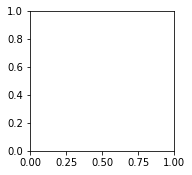

In [20]:
#JL, AB

train = pd.read_csv('Train_cancer.csv')
train.head()

train.drop(train.columns[0], axis=1, inplace=True)

columns = list(train.columns)
columns.remove('Icon')

mainfig = plt.figure(figsize=(15,18))
i = 1
for column in columns:
    ax = mainfig.add_subplot(6,5,i)
    n, bins, patches = ax.hist(train[column], bins = 50)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    i = i+1


### 1.5 R Squared Values

#### Function to calculate combinations of list objects

In [44]:
#JL

np.random.seed(42) # Because. The answer to everything. 


# Don't bother with this fucntion. You just need to know that it calculates combinations 
# of list objects. Read the dosctring (the text right after the function definition) for
# more info.  
def ic(iterable, r):
    '''
    Copied from the itertools module documentation:
        https://docs.python.org/2/library/itertools.html#itertools.combinations
    -----------------------------------------------------------------------------
    combinations('ABCD', 2) --> AB AC AD BC BD CD
    combinations(range(4), 3) --> 012 013 023 123
    pool = tuple(iterable)
    n = len(pool)
    '''
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = range(r)
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield tuple(pool[i] for i in indices)
        

#### Obtaining only the continuous variables

In [21]:
#JL

potential_vars = list(train.columns)

potential_vars.remove('Icon')
potential_vars.remove('Route')
potential_vars.remove('Stop')


cont_vars = potential_vars

print cont_vars

TypeError: remove() takes exactly one argument (3 given)

#### Calculate the R^2 values

In [48]:
#JL

allpairs = list(ic(cont_vars, 2))

rsquares = []
for pair in allpairs:
    newmodel = smf.ols(data = train, formula = pair[0]+'~'+pair[1]).fit()
    rsquares.append((newmodel.rsquared, pair))
    
rsquares = sorted(rsquares, key = lambda tup:tup[0], reverse = True)

for rs in rsquares:
    print rs


(0.99567225332879417, ('radius_mean', 'perimeter_mean'))
(0.98701445444758462, ('radius_worst', 'perimeter_worst'))
(0.97325309150957529, ('radius_mean', 'area_mean'))
(0.97243381271218465, ('perimeter_mean', 'area_mean'))
(0.96529739025249894, ('radius_worst', 'area_worst'))
(0.95377891920665492, ('perimeter_worst', 'area_worst'))
(0.94915504314929999, ('radius_se', 'perimeter_se'))
(0.94591675413175447, ('perimeter_mean', 'perimeter_worst'))
(0.94218476009361096, ('radius_mean', 'radius_worst'))
(0.94032855622809752, ('perimeter_mean', 'radius_worst'))
(0.9366239802269628, ('radius_mean', 'perimeter_worst'))
(0.92540892800747654, ('area_mean', 'area_worst'))
(0.9246853275091732, ('area_mean', 'radius_worst'))
(0.92141174544370086, ('area_mean', 'perimeter_worst'))
(0.904388393282476, ('radius_se', 'area_se'))
(0.89077649136859249, ('perimeter_mean', 'area_worst'))
(0.89049287648720299, ('radius_mean', 'area_worst'))
(0.87767807562445466, ('perimeter_se', 'area_se'))
(0.84164028137088

The highest r squared values are between varaibles that are by definition linearly related: are and perimeter, area and radius. 

## 2. Explanatory

### 2.1 GLM Model

Initially trying a simpe GLM model with a selected variable that showed strong correlations with diagnosis from the exploratory phase.
A GLM model is used rather than an OLS model as 'diagnosis' is a categorical variable.
A logit function is used.

In [25]:
train.head()

,Timestamp,Cloud cover,Temperature,Humidity,Icon,Precip intensity,Precip probability,Route,Stop,Stops away,Distance
0,2019-01-02 06:51:06,1.00,19.25,0.90,snow,0.0089,0.11,B57,SMITH ST/UNION ST,13.0,1.60
1,2019-01-04 06:55:04,0.98,21.26,0.59,cloudy,0.0000,0.00,B57,SMITH ST/UNION ST,9.0,1.10
2,2019-01-04 15:27:06,1.00,14.97,0.76,cloudy,0.0024,0.03,B57,SMITH ST/UNION ST,11.0,1.44
3,2019-01-05 03:25:04,0.99,13.71,0.93,snow,0.0105,0.06,B57,SMITH ST/UNION ST,5.0,0.68
4,2019-01-07 16:15:06,0.61,14.80,0.41,partly-cloudy-night,0.0000,0.00,B57,SMITH ST/UNION ST,7.0,0.95


In [27]:
#AB

modeltry = smf.ols(formula = 'Distance~Temperature', data = train, family = sm.families.Binomial()).fit()
print modeltry.summary()

AttributeError: 'Binomial' object has no attribute 'ndim'

### 2.2 Confusion Matrix

A confusion matrix function is presented here to analyse the performance of the model

In [50]:
#AB

def confmatrix(model):
    train = pd.read_csv('Train_cancer.csv')
    train['diagnosis'].replace(('B', 'M'), (1, 0), inplace=True)
    conf_mat = confusion_matrix(train['diagnosis'], model.predict()>0.5, labels = [0, 1])
    thing = pd.DataFrame(conf_mat, index = [0, 1], columns = [0, 1])
    plt.figure(figsize = (5,3.5))
    sns.heatmap(thing, annot=True, fmt='g', cmap = 'binary')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

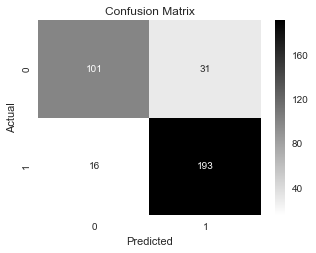

In [51]:
confmatrix(modeltry)

### 2.3 Forward Selection

#### This is a function to perform the forward selection.

In [52]:
#KJ, JM

def forward_selector_glm(data, response, threshold = 0.04):
    """Generalised linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels generalised linear model
           with an intercept
           selected by forward selection
           evaluated by deviance
           
    Modified from: http://planspace.org/20150423-forward_selection_with_statsmodels/ #af
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000.0, 10000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        

        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.glm(formula, data, family = sm.families.Binomial()).fit().deviance
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse = True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if (best_new_score + best_new_score*threshold) < current_score : #  Thresholding
            print best_candidate, '\t' , best_new_score
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.glm(formula, data, family = sm.families.Binomial()).fit()
    return model

#### Performing the forward selection on our datatset:

In [53]:
#KJ, JM

train = pd.read_csv('Train_cancer.csv')

train.drop(train.columns[0], axis=1, inplace=True)

model = forward_selector_glm(train, 'diagnosis',threshold=0.1)
print model.model.formula
model.summary()


concave_points_mean 	152.676546117
area_worst 	109.771438441
texture_worst 	72.7093214787
perimeter_mean 	62.4183812092
diagnosis ~ concave_points_mean + area_worst + texture_worst + perimeter_mean + 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                         
============================================================================================
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  341
Model:                                          GLM   Df Residuals:                      336
Model Family:                              Binomial   Df Model:                            4
Link Function:                                logit   Scale:                             1.0
Method:                                        IRLS   Log-Likelihood:                -31.209
Date:                              Sun, 25 Jun 2017   Deviance:                       62.418
Time:                                      22:27:57   Pearson chi2:                     672.
No. Iterations:                                  10                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.0871      4.393      2.068      0.039       0.476      17.698
concave_points_mean  -122.8010     24.039     -5.108      0.000    -169.917     -75.685
area_worst             -0.0241      0.006     -3.793      0.000      -0.036      -0.012
texture_worst          -0.3052      0.071     -4.309      0.000      -0.444      -0.166
perimeter_mean          0.2650      0.095      2.779      0.005       0.078       0.452
=======================================================================================
"""

#### Model produced from forward selection

In [54]:
#KJ, JM

forwardmodel = smf.glm(formula = 'diagnosis~concave_points_mean + area_worst + texture_worst + perimeter_mean', data = train, family = sm.families.Binomial()).fit()
print forwardmodel.summary()


                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  341
Model:                                          GLM   Df Residuals:                      336
Model Family:                              Binomial   Df Model:                            4
Link Function:                                logit   Scale:                             1.0
Method:                                        IRLS   Log-Likelihood:                -31.209
Date:                              Sun, 25 Jun 2017   Deviance:                       62.418
Time:                                      22:28:03   Pearson chi2:                     672.
No. Iterations:                                  10                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

#### 2.4 Complexity Plotting

In [55]:
#KJ, AB

# train = pd.read_csv('Train_cancer.csv')

# train.drop(train.columns[0], axis=1, inplace=True)
# #train.drop(train.columns[12:len(train.columns)], axis=1, inplace=True)

# var_list = train.columns.values
# new_var_list = var_list[1:]
# np.random.shuffle(new_var_list)

# complexity = list(range(1,len(new_var_list)+1))
# training_error = []
# for i in range(len(new_var_list)):
#     variables = new_var_list[0:i]
#     formula = "{} ~ {} + 1".format('diagnosis',' + '.join(variables))
#     model = smf.glm(formula = formula, data = train, family = sm.families.Binomial()).fit()
#     training_error.append(model.deviance)    

# plt.plot(complexity, training_error, color = 'blue', label = 'Training Error')
# plt.xlabel('Complexity')
# plt.ylabel('Deviance')
# plt.show()

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
#KJ, AB

# validate = pd.read_csv('Validate_cancer.csv')

# validate.drop(validate.columns[0], axis=1, inplace=True)
# #validate.drop(validate.columns[12:len(validate.columns)], axis=1, inplace=True)

# validate_complexity = list(range(1,len(new_var_list)+1))
# training_error_2 = []
# validate_error = []
# for i in range(len(new_var_list)):
#     variables = new_var_list[0:i]
#     formula = "{} ~ {} + 1".format('diagnosis',' + '.join(variables))
#     model = smf.glm(formula = formula, data = train, family = sm.families.Binomial()).fit()
#     model2 = smf.glm(formula = formula, data = validate, family = sm.families.Binomial()).fit()
#     training_error_2.append(model.deviance)
#     validate_error.append(model2.deviance)

# plt.plot(validate_complexity, training_error_2, color = 'blue', label = 'Training')
# plt.plot(validate_complexity, validate_error, color = 'red', label = 'Validate')
# plt.legend()
# plt.xlabel('Complexity')
# plt.ylabel('Deviance')
# plt.show()

### Complexity plot Train vs. Test

In [56]:
# test = pd.read_csv('Test_cancer.csv')
# test.drop(test.columns[0], axis=1, inplace=True)

# complexity = list(range(1,len(new_var_list)+1))
# training_error = []
# test_error = []
# for i in range(len(new_var_list)):
#     variables = new_var_list[0:i]
#     formula = "{} ~ {} + 1".format('diagnosis',' + '.join(variables))
#     model = smf.glm(formula = formula, data = train, family = sm.families.Binomial()).fit()
#     model3 = smf.glm(formula = formula, data = test, family = sm.families.Binomial()).fit()
#     training_error.append(model.deviance)
#     test_error.append(model3.deviance)

# plt.plot(complexity, training_error, color = 'blue', label = 'Training')
# plt.plot(complexity, test_error, color = 'red', label = 'Test')
# plt.legend()
# plt.xlabel('Complexity')
# plt.ylabel('Deviance')
# plt.show()

PerfectSeparationError: Perfect separation detected, results not available

#### 2.5 Testing model from forward selection

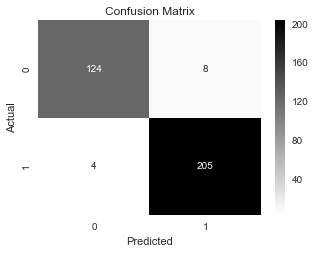

In [57]:
confmatrix(forwardmodel)

The complexity matrix reaveals that our glm model is accurate, howerver more advanced alrotihms may hep acheive greater accuracy.

# 3. Predictive

### 3.1 Logistic Regression
It is important to note that the cross validation coeficient is 5 on validate and test sets. Indeed, these have fewer datapoints and therefore cannot be separated in as many subsets as the train data set. This ensure that no subset has only positive or negaotvie outcomes introducing bias.

In [58]:
#JL

train = pd.read_csv('Train_cancer.csv')
validate = pd.read_csv('Validate_cancer.csv')
test = pd.read_csv('Test_cancer.csv')

selected_vars = ['concave_points_mean', 'area_worst', 'texture_worst', 'perimeter_mean']
X_train = np.array(train[selected_vars])
y_train = np.array(train['diagnosis'])
X_validate = np.array(validate[selected_vars])
y_validate = np.array(validate['diagnosis'])
X_test = np.array(test[selected_vars])
y_test = np.array(test['diagnosis'])

model = LogisticRegression(penalty='l1', C=0.5, fit_intercept = True)

scores1 = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores2 = cross_val_score(model, X_validate, y_validate, cv=5, scoring='accuracy')
#scores3 = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')

print 'Logistic regression results'
print 'Train set: Mean accuracy from the cross-validation: %.3f' %np.mean(scores1)
print 'and the full vector: %s\n' %(', '.join(map("{:.3f}".format, scores1)))

model.fit(X_train, y_train)
print 'Train set results'
print '\n'.join(['%s: %.3f'%i for i in zip(selected_vars, list(model.coef_[0]))])

print 'Accuracy on the validate set: %.3f' %accuracy_score(y_validate, model.predict(X_validate))
print 'Accuracy on the test set: %.3f' %accuracy_score(y_test, model.predict(X_test))



Logistic regression results
Train set: Mean accuracy from the cross-validation: 0.909
and the full vector: 0.857, 0.886, 0.882, 1.000, 1.000, 0.853, 0.971, 0.853, 0.912, 0.879

Train set results
concave_points_mean: 0.000
area_worst: 0.022
texture_worst: 0.138
perimeter_mean: -0.239
Accuracy on the validate set: 0.939
Accuracy on the test set: 0.974


### 3.2 Decision Tree

In [60]:
train = pd.read_csv('Train_cancer.csv')
validate = pd.read_csv('Validate_cancer.csv')
test = pd.read_csv('Test_cancer.csv')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Icon'])
le.transform(train['Icon'])

le.fit(validate['Icon'])
le.fit(test['Icon'])

test['Icon'].head

ValueError: y contains new labels: [nan nan nan nan]

In [17]:
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('Train_cancer.csv')
test = pd.read_csv('Test_cancer.csv')

train.fillna(train.mean(), inplace= True)
train.fillna('non', inplace=True)

test.fillna(train.mean(), inplace= True)
test.fillna('non', inplace=True)

pd.get_dummies(train)
pd.get_dummies(test)

print train

                Timestamp  Cloud cover  Temperature  Humidity  \
0     2019-01-02 06:51:06         1.00        19.25      0.90   
1     2019-01-04 06:55:04         0.98        21.26      0.59   
2     2019-01-04 15:27:06         1.00        14.97      0.76   
3     2019-01-05 03:25:04         0.99        13.71      0.93   
4     2019-01-07 16:15:06         0.61        14.80      0.41   
5     2019-01-05 19:06:05         1.00        11.91      0.92   
6     2019-01-03 20:45:05         0.00         5.21      0.41   
7     2019-01-04 22:34:05         1.00        14.04      0.88   
8     2019-01-03 02:46:05         0.19         6.80      0.53   
9     2019-01-02 07:59:05         1.00        19.97      0.87   
10    2019-01-06 21:21:09         0.00         1.75      0.48   
11    2019-01-04 01:56:04         0.79         3.34      0.43   
12    2019-01-04 11:26:04         0.98        17.59      0.71   
13    2019-01-08 08:59:04         0.98        18.98      1.00   
14    2019-01-07 06:27:07

In [16]:
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('Train_cancer.csv')
test = pd.read_csv('Test_cancer.csv')

train.fillna(train.mean(), inplace= True)
train.fillna('non', inplace=True)

test.fillna(train.mean(), inplace= True)
test.fillna('non', inplace=True)

pd.get_dummies(train)
pd.get_dummies(test)

#selected_vars = list(train.columns)

selected_vars = 
X_train = np.array(train[selected_vars], dtype=np.float64 )
y_train = np.array(train['Distance'], dtype=np.float64)

X_test = np.array(test[selected_vars], dtype=np.float64)
y_test = np.array(test['Distance'], dtype=np.float64)

print X_test
rr =  RandomForestRegressor(n_estimators=10)

rr.fit(X_train, y_train)

    
t = rr.predict(X_test)


x = X_test[3,:]

print x
t = rr.predict(x)





ValueError: could not convert string to float: SMITH ST/UNION ST

In [77]:
#JL

train = pd.read_csv('Train_cancer.csv')
validate = pd.read_csv('Validate_cancer.csv')
test = pd.read_csv('Test_cancer.csv')


train.fillna(train.mean())

selected_vars = ['Stops away', 'Temperature']
X_train = np.array(train[selected_vars])
y_train = np.array(train['Distance'])
X_validate = np.array(validate[selected_vars])
y_validate = np.array(validate['Distance'])
X_test = np.array(test[selected_vars])
y_test = np.array(test['Distance'])


clf = tree.DecisionTreeClassifier(max_depth=3, min_impurity_split=0.2)

scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

clf.fit(X_train, y_train) 
print 'Decision tree classifier results'
print '\n Train set: Mean accuracy from the cross-validation: %.3f \nand the full vector: %s\n' %(np.mean(scores1),
                                                                                               ','.join(map("{:.3f}".format, scores1))) 
print 'Accuracy on the validate set: %.3f' %accuracy_score(y_validate, clf.predict(X_validate))
print 'Accuracy on the test set: %.3f' %accuracy_score(y_test, clf.predict(X_test))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### 3.3 Random Forest

In [63]:
#JL

train = pd.read_csv('Train_cancer.csv')
validate = pd.read_csv('Validate_cancer.csv')
test = pd.read_csv('Test_cancer.csv')

selected_vars = ['Stops away', 'Temperature']
X_train = np.array(train[selected_vars])
y_train = np.array(train['Distance'])
X_validate = np.array(validate[selected_vars])
y_validate = np.array(validate['Distance'])
X_test = np.array(test[selected_vars])
y_test = np.array(test['Distance'])

clf2 = ensemble.RandomForestClassifier(n_estimators=100)
scores1 = cross_val_score(clf2, X_train, y_train, cv=10, scoring='accuracy')

print 'Random forest model results'
print 'Train set: Mean accuracy from the cross-validation: %.3f \nand the full vector: %s\n' %(np.mean(scores1), ','.join(map("{:.3f}".format, scores1)))
clf2.fit(X_train, y_train)

print 'Accuracy on the validate set: %.3f' %accuracy_score(y_validate, clf2.predict(X_validate))
print 'Accuracy on the test set: %.3f' %accuracy_score(y_test, clf2.predict(X_test))

Random forest model results


NameError: name 'scores1' is not defined

### 3.4 Support Vector Machine (SVM)

In [64]:
#JL
train = pd.read_csv('Train_cancer.csv')
validate = pd.read_csv('Validate_cancer.csv')
test = pd.read_csv('Test_cancer.csv')

selected_vars = ['Stops away', 'Temperature']
X_train = np.array(train[selected_vars])
y_train = np.array(train['Distance'])
X_validate = np.array(validate[selected_vars])
y_validate = np.array(validate['Distance'])
X_test = np.array(test[selected_vars])
y_test = np.array(test['Distance'])


parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svr = svm.SVC()
clf3 = GridSearchCV(svr, parameters, cv=5, scoring='accuracy')

print 'Train set SVM results'
clf3.fit(X_train,y_train)
print clf3.best_params_
print 'Accuracy on the train set: %.3f' %accuracy_score(y_train, clf3.predict(X_train))

print 'Validate set SVM results'

print 'Accuracy on the validate set: %.3f' %accuracy_score(y_validate, clf3.predict(X_validate))

print 'Test set SVM results'
print 'Accuracy on the test set: %.3f' %accuracy_score(y_test, clf.predict(X_test))

Train set SVM results


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Conclusion
4 types of predictive analysis were conducted: Logistic regression, decision tree, random forest alrothm and SVm. The SVM provides the highest accuracy, but all models achieve simmular results on train, validate and test set.